# 1: Introduction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

haberman = pd.read_csv('haberman.csv')


Info about dataset: obeservations of cancer surviving patients after an operation:   
Colums are marked as :  
30 - Age  
64 - Op_Year  
1 - number of positive axil_nodes  
1 - Surv_status (1 - lived 5 yrs or longer, 2 - died within 5 years)

In [2]:
#How many datapoints and features?
print(haberman.shape)

(305, 4)


No of datapoint: 305  
No of features: 4

In [3]:
#Column names in our dataset
'''here we changed the col names as per our convenience'''

haberman.columns= ['age','op_year','axil_node_det', 'status']
print(haberman.columns)

Index(['age', 'op_year', 'axil_node_det', 'status'], dtype='object')


In [4]:
# data points for each class/dependent variable
haberman['status'].value_counts()

1    224
2     81
Name: status, dtype: int64

Observation:  
-Imbalance dataset  
-224 patiants lived 5 yrs or more after the operation  
-81 lived less than 5 yrs  

In [5]:
#changing the value of dataset into readble: 1 into survived_upto5 and 2 into survived 5 plus 
import warnings
warnings.filterwarnings('ignore')
x=0
for row, col in haberman.iterrows():
    if haberman['status'][row] == 1:
        haberman['status'][row] = 'survived_5_plus'
    else:
        haberman['status'][row] = 'survived_upto5'


In [6]:
haberman['status'].value_counts()

survived_5_plus    224
survived_upto5      81
Name: status, dtype: int64

# 2: 2-D Scatter plot

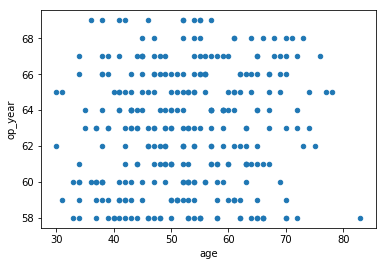

In [7]:
haberman.plot(kind = 'scatter', x = 'age', y = 'op_year')
plt.show()

Conclusion: We can't differentiate between the two type of patiants 

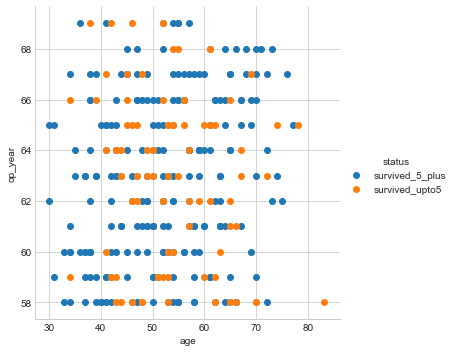

In [8]:
# setting color coding
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='status',size=5).map(plt.scatter, 'age', 'op_year').add_legend()
plt.show()

Conlclusion: We can see which data is which after using color coding and adding legend. But, we still can't distinguish between the two.       So we will try to see if there are any pair of features which can help us to seprate our datapoints.

# 3. Pair Plots

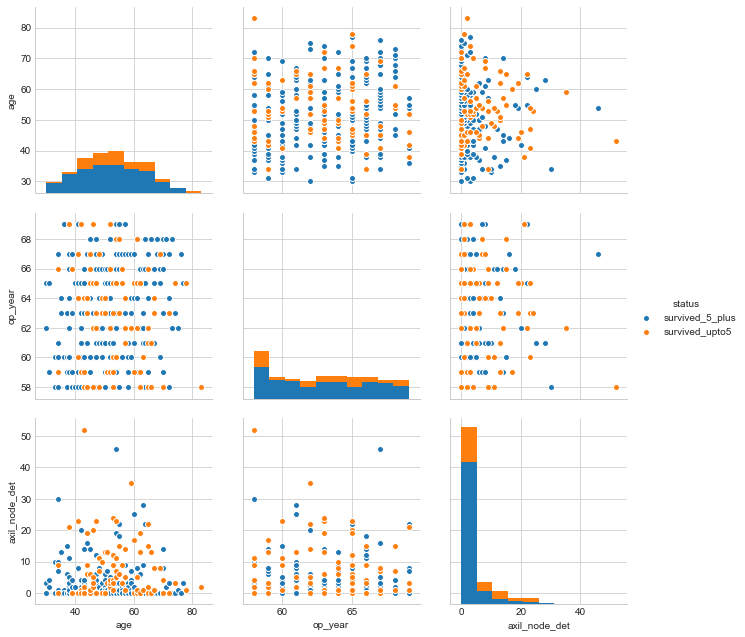

In [9]:
plt.close()
sns.set_style('whitegrid')
# to color data points 
#sns.pairplot(haberman, hue='status',size=3, palette=dict(survived_upto5='#E85F5C', survived_5_plus='#ACF39D'))
sns.pairplot(haberman, hue='status',size=3)
plt.show()

Observation: We have looked into different pairs and plotted them. There not a single pair of feature which can help us to diferentiate the data.

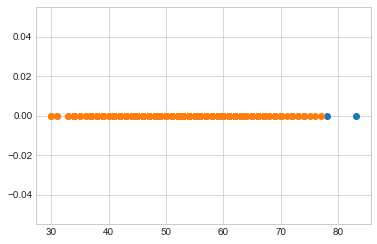

In [10]:
# 1D scatter plot 
plt.close()
less_than_5 = haberman.loc[haberman['status']=='survived_upto5']
more_than_5 = haberman.loc[haberman['status']=='survived_5_plus']
#print(less_than_5['age'])
plt.plot(less_than_5['age'], np.zeros_like(less_than_5['age']),'o')
plt.plot(more_than_5['age'],np.zeros_like(more_than_5['age']),'o')

plt.show()


Observation: lots of overlapping

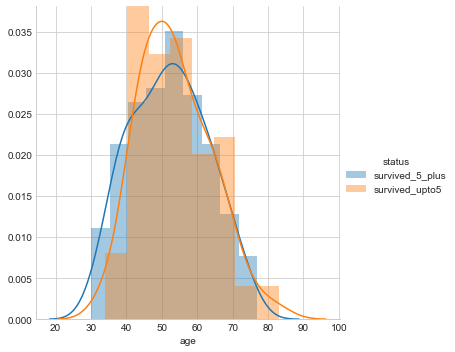

In [11]:

plt.close()
sns.FacetGrid(haberman, hue='status',size=5).map(sns.distplot,'age').add_legend()
plt.show()

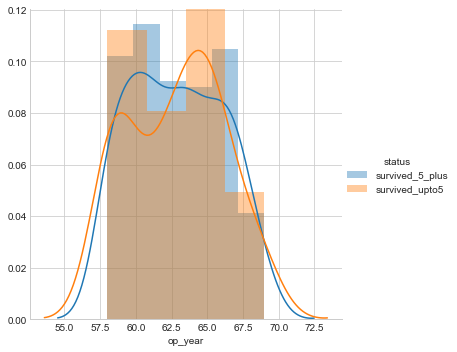

In [12]:
plt.close()
sns.FacetGrid(haberman, hue='status',size=5).map(sns.distplot,'op_year').add_legend()
plt.show()

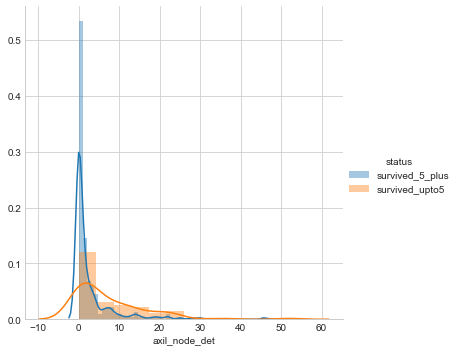

In [13]:
plt.close()
sns.FacetGrid(haberman, hue='status',size=5).map(sns.distplot,'axil_node_det').add_legend()
plt.show()

Oservation: We can see the data points are overlapping. We can not found any disctinct feartures. 
    But as the histogram and pdf axilary nodes detected plays most significant role in success of the treatment.
    So we will continue with that and explore more.
   

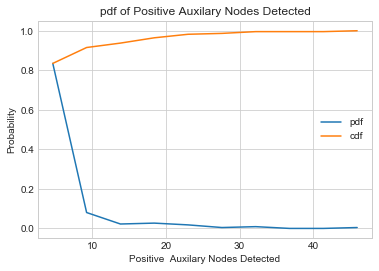

In [39]:
#plot cdf of age for those who survived more than 5 yrs

counts, bin_edges= np.histogram(more_than_5['axil_node_det'],density=True)

#print(counts)
#print(bin_edges)

pdf = counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'pdf')
plt.plot(bin_edges[1:],cdf, label = 'cdf')
plt.legend()
plt.xlabel("Positive  Auxilary Nodes Detected")
plt.ylabel("Probability")
plt.title('pdf of Positive Auxilary Nodes Detected')
sns.set_style('whitegrid')

Observation:  
Concluded from PDF:  
-There are high chance of survival if the numbere of nodes detected are less than 5 i.e.82% .  
-Chances of survival rapidly decrease as nodes deteced are upto 9.  
-The chances of survival are very low if the node detected are higher than 13.  
Concluded from CDF:
The probability of survival is almost 82% if the patiant has dignosed with 5 axil nodes.

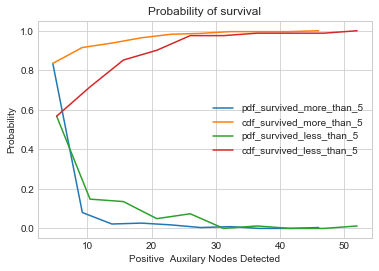

In [40]:
# plot cdf and pdf of age for all the survival status

#more than 5
counts, bin_edges= np.histogram(more_than_5['axil_node_det'],density=True)

pdf = counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'pdf_survived_more_than_5')
plt.plot(bin_edges[1:],cdf, label = 'cdf_survived_more_than_5')

# who survived less than 5 yrs

counts, bin_edges= np.histogram(less_than_5['axil_node_det'],density=True)

pdf = counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'pdf_survived_less_than_5')
plt.plot(bin_edges[1:],cdf, label = 'cdf_survived_less_than_5')
plt.legend()
plt.xlabel("Positive  Auxilary Nodes Detected")
plt.ylabel("Probability")
plt.title('Probability of survival')
sns.set_style('whitegrid')

Observation:  
There are 55% probability that the patiant will live upto 5 yrs if the positive nodes detected are 5.  
The probability decrease rapidly.  
If nodes detected are 9 then there are only 5% probability that patiant will live upto 5 yrs.

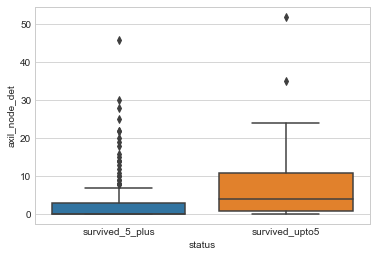

In [17]:
#Box plots

sns.boxplot(x='status', y='axil_node_det',data=haberman)
plt.show()

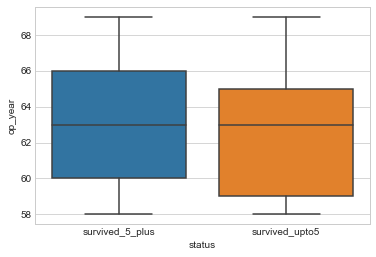

In [18]:
sns.boxplot(x='status', y='op_year',data=haberman)
plt.show()


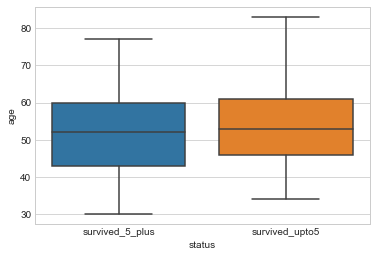

In [19]:
sns.boxplot(x='status', y='age', data = haberman)
plt.show()

Observation : We can see that we can get best results using positive auxilary nodes detected because other features are overlapping a lot.

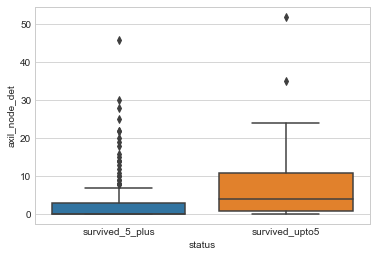

In [20]:
sns.boxplot(x='status', y='axil_node_det',data=haberman)
plt.show()

In [21]:
# trying to see how much we can get it right

print(np.percentile(less_than_5['axil_node_det'],np.arange(0,101,25)))
print(np.percentile(more_than_5['axil_node_det'],np.arange(0,101,25)))
# got below values by hit and trial
print(np.percentile(less_than_5['axil_node_det'],47))
print(np.percentile(more_than_5['axil_node_det'],75))

[ 0.  1.  4. 11. 52.]
[ 0.  0.  0.  3. 46.]
3.0
3.0


Observation: 75th percentile of 'survived 5+' is approx equal to 47th percentile of people survived 'upto 5yrs'.
We will get 47% incorrect and 53% correct information about people who survived upto 5 yrs.  
We will get 25% incorrect and 75% correct information about people who lived longer than 5 yrs.


In [22]:
# deducing success rate on the basis box plots

less_lived=0
more_lived=0

for row, col in haberman.iterrows():
    if col['axil_node_det'] <=3:
        more_lived+=1
    else: less_lived+=1
        
print('Number of people who survived upto 5 yrs: ',less_lived)
print('Number of people who survived more than 5 yrs: ',more_lived)

Number of people who survived upto 5 yrs:  89
Number of people who survived more than 5 yrs:  216


Obeservation: we got 3.57% error in over all performance

# Observation:

-The number of positive auxalary nodes detected is crucial for the survival of the patiant after the operation.  
-We have tried bivariate and univariate analysis and found out univarite is the only way to get to a conclusion  
-Using Univariate analysis we plotted pdfs, cdfs and box plot.  
-pdf and cdf were able to give us the chances of survival of the patiants depending on the positive auxialry nodes detected. But we couldn't get a clear make any clear distinction using pdf.  
-Using box plots we found out that what's the ovarlapping of the datapoints and using percentiles we were able to make clear distinctions with 3.57 % error.


# Conclusion:

We have tried to make sense out of the data. We have looked with all the features like age, year of operation and number of positive nodes detected. But, we could make out sense with number of positive nodes detected. We can say that chances of survival of an patiant is  better if she was dignosed with lesser number of positive nodes. 